#### 데이터분석에서 벡터는 1차원배열을 의미한다.(1행0열)

##### keras 쓰려면 먼저 pip install tensorflow 한뒤 pip install keras

In [4]:
##############################################
# Modeling    
##############################################
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers,models
from sklearn import preprocessing

def ANN_seq_func(Nin, Nh, Nout):

    model = keras.models.Sequential()
    """ Keras 모델 시작 """
    
    #입력개수 Nin +)콤마쓰는이유? 데이터를 튜플로인식함
    model.add(layers.Dense(Nh,activation='relu',input_shape=(Nin,)))
    """입력 계층 노드 수 Nin 개,  은닉 계층의 노드 수(출력) Nh 개, 활성함수는 relu"""
    
    #신경세포 하나 더 만듦, 바로앞에있는애 출력개수가 입력개수되기때문에 입력개수안써줘도됨
    #여기서 출력값은 최종으로 받을 데이터값 보통 Nout자리에 1많이씀
    model.add(layers.Dense(Nout,activation='relu'))
    """출력 노드 수 Nout 개,  활성함수는  relu) """

    model.compile(loss='mse',optimizer='sgd')
    """ cost함수 - mse – 평균 제곱 오차  최적화  알고리즘 -SGD(확률적 경사하강법) 
    """

    return model

In [5]:
##############################################
# Data  학습과 평가용 데이터 불러오기 
##############################################
from tensorflow.keras import datasets

def Data_func():  #데이터 전처리
    (X_train, y_train), (X_test, y_test) = datasets.boston_housing.load_data()
    scaler = preprocessing.MinMaxScaler()   # 데이터 정규화  
    X_train = scaler.fit_transform(X_train) #fit은 최소값,최대값찾아서0,1로해주고 그걸 적용시키는게 transforrm
    X_test = scaler.transform(X_test)
    print (X_train.shape, y_train.shape )
    
    return (X_train, y_train), (X_test, y_test)


57344/57026 [==============================] - 0s 0us/step
(404, 13) (404,)
Epoch 1/100
4/4 - 0s - loss: 528.4812 - val_loss: 216.6908
Epoch 2/100
4/4 - 0s - loss: 138.5858 - val_loss: 134.5677
Epoch 3/100
4/4 - 0s - loss: 121.3168 - val_loss: 88.1038
Epoch 4/100
4/4 - 0s - loss: 75.4174 - val_loss: 70.1711
Epoch 5/100
4/4 - 0s - loss: 65.4547 - val_loss: 65.2592
Epoch 6/100
4/4 - 0s - loss: 55.6591 - val_loss: 58.9999
Epoch 7/100
4/4 - 0s - loss: 52.7989 - val_loss: 75.8636
Epoch 8/100
4/4 - 0s - loss: 50.9362 - val_loss: 59.1602
Epoch 9/100
4/4 - 0s - loss: 54.2849 - val_loss: 65.9300
Epoch 10/100
4/4 - 0s - loss: 46.1061 - val_loss: 45.8137
Epoch 11/100
4/4 - 0s - loss: 41.5992 - val_loss: 44.2056
Epoch 12/100
4/4 - 0s - loss: 39.3781 - val_loss: 52.6807
Epoch 13/100
4/4 - 0s - loss: 41.4098 - val_loss: 73.7267
Epoch 14/100
4/4 - 0s - loss: 65.1715 - val_loss: 100.3952
Epoch 15/100
4/4 - 0s - loss: 56.9431 - val_loss: 43.0517
Epoch 16/100
4/4 - 0s - loss: 41.2058 - val_loss: 48.0159

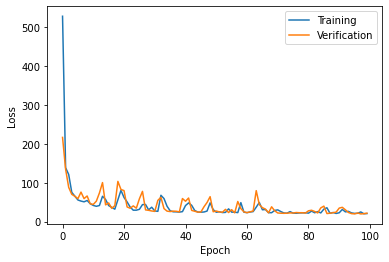

In [6]:
##############################################
# Plotting  결과 그래프 구현 
##############################################
import matplotlib.pyplot as plt
%matplotlib inline 

##############################################
# Main  회귀 ANN 학습 및 성능 분석 
##############################################
def main():
    Nin = 13
    Nh = 5
    Nout = 1

    #Nh는 최종출력층의 데이터보단 많으면됨(?)
    model = ANN_seq_func(Nin, Nh, Nout) #학습가능한 데이터를 받은것(13,5,1)
    (X_train, y_train), (X_test, y_test) = Data_func()
    
    #verbose는 로그레벨, validation_split 은 학습데이터(xtrainytrain)은 80만 시키고 20은 학습안시켜서 둘다 loss 체크
    history = model.fit(X_train,y_train,epochs=100,batch_size=100,\
                       validation_split=0.2,verbose=2)
    
    #test데이터로 정확도확인
    performace_test =  model.evaluate(X_test,y_test,batch_size=100)
    print('\nTest Loss -> {:.2f}'.format(performace_test))

    
    history = history.history
    """Cost/Loss  변화 추이 그래프"""
    plt.plot(history['loss'])
    plt.plot(history['val_loss'] )
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0)
    plt.show()


if __name__ == '__main__':
    main()